# <font color='maroon'>Assessment</font>
Given the following dataset, answer the questions that follow. The necessary libraries have been imported.


In [2]:
import matplotlib.pyplot as plt
from numpy import arange
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import random as rnd
from random import sample 

In [3]:
%matplotlib inline

In [5]:
data = pd.read_csv('athletes_.csv', sep=',', low_memory=False)

In [6]:
data.info

<bound method DataFrame.info of         athlete_id               name               region  \
0           2554.0          Pj Ablang           South West   
1           3517.0      Derek Abdella                  NaN   
2           4691.0                NaN                  NaN   
3           5164.0        Abo Brandon  Southern California   
4           5286.0        Bryce Abbey                  NaN   
5           6491.0        Jason Abney                  NaN   
6           6610.0      Anthony Abeel        South Central   
7           7268.0                NaN                  NaN   
8           7463.0          Tye Abell                  NaN   
9           8242.0      Ryan Achilles                  NaN   
10         10890.0       Damian Abson                  NaN   
11         11003.0                NaN                  NaN   
12         11416.0      Mike Abgarian                  NaN   
13         13285.0        Kipp Abbott         Central East   
14         13576.0     Mikko Aaltonen 

In [7]:
pd.set_option('display.max_columns', None) 
data.head(5)

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220.0,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,645.0,300.0,NaN,196.0,NaN,NaN,245.0,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,465.0,NaN,1053.0,NaN,NaN,1081.0,205.0,150.0,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|,NaN


### Question 1
Study the data. What is the size of the dataset?

In [8]:
data.shape
# 423006 rows x 28 columns

(423006, 28)

#### Question 1.1
Generate summary statistics of the data.

In [9]:
data.describe()

,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups
count,423003.000000,331110.000000,1.598690e+05,229890.000000,5.542600e+04,3.027900e+04,4.074500e+04,1.935900e+04,2.973800e+04,2.224600e+04,3.609700e+04,1.044350e+05,9.728000e+04,1.153230e+05,1.105170e+05,5.060800e+04
mean,292748.166538,32.516750,1.206217e+02,170.896137,9.886691e+02,1.207950e+03,5.766025e+02,2.127863e+03,1.472252e+03,5.241279e+02,3.411464e+03,2.709107e+02,2.424957e+02,6.970503e+02,5.852109e+02,4.269613e+04
std,184969.660327,7.730671,2.097995e+04,58.379799,7.200430e+04,6.824091e+04,4.891145e+04,6.055021e+04,9.762688e+04,5.628804e+04,1.251980e+05,2.596882e+04,2.708942e+04,5.523235e+04,5.052976e+04,9.546078e+06
min,82.000000,13.000000,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,-6.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+01,0.000000e+00,-5.000000e+02,-7.000000e+00,-6.000000e+00
25%,135091.500000,27.000000,6.600000e+01,145.000000,2.150000e+02,5.250000e+02,1.490000e+02,1.308000e+03,2.400000e+02,6.200000e+01,1.242000e+03,1.400000e+02,1.050000e+02,2.550000e+02,2.050000e+02,1.500000e+01
50%,275839.000000,31.000000,6.900000e+01,170.000000,2.900000e+02,5.950000e+02,1.930000e+02,1.550000e+03,2.940000e+02,7.100000e+01,1.380000e+03,1.950000e+02,1.450000e+02,3.450000e+02,2.750000e+02,2.700000e+01
75%,473188.000000,37.000000,7.200000e+01,192.000000,3.920000e+02,6.940000e+02,2.620000e+02,1.809000e+03,3.360000e+02,8.400000e+01,1.560000e+03,2.350000e+02,1.850000e+02,4.150000e+02,3.350000e+02,3.900000e+01
max,633083.000000,125.000000,8.388607e+06,20175.000000,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,2.147484e+09


#### Question 1.2
Are the any missing values?  A simple strategy would be to remove rows with missing values. This can however reduce the size of the dataset. Another technique is to imput missing values with a sensible value like the mean.

For more on how to deal with missing values, see this blog entry: [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/).

In [10]:
data.isnull().sum()

athlete_id                 3
name                   91896
region                171744
team                  267846
affiliate             181090
gender                 91896
age                    91896
height                263137
weight                193116
fran                  367580
helen                 392727
grace                 382261
filthy50              403647
fgonebad              393268
run400                400760
run5k                 386909
candj                 318571
snatch                325726
deadlift              307683
backsq                312489
pullups               372398
eat                   329074
train                 317175
background            324061
experience            318070
schedule              325131
howlong               313800
retrieved_datetime    114061
dtype: int64

In [11]:
#data['height'] = data['height'].replace(0, data['height'].mean())
#data['height'].fillna(data['height'].mean(), inplace=True)
d= data['height']
d.dropna(inplace=True)
d.describe()

count    1.598690e+05
mean     1.206217e+02
std      2.097995e+04
min      0.000000e+00
25%      6.600000e+01
50%      6.900000e+01
75%      7.200000e+01
max      8.388607e+06
Name: height, dtype: float64

In [12]:
#There are some major outliers in the height data, so I limited the dataset to 99th percentile 
#p = np.percentile(data['height'], 99)
p = np.percentile(d, 99)
#filtered = data[(data['height'] <= p) == True]
filtered = d[(d<= p) == True]
filtered.describe()



count    159043.000000
mean         67.880359
std           7.409877
min           0.000000
25%          66.000000
50%          69.000000
75%          71.000000
max          77.000000
Name: height, dtype: float64

### Question 2

Study the `height` column. What distribution does the data follow? 
Hint: Use a histogram or density plot to visualise the data.

#Please Note: Logarithmic scale on Y-Axis
plt.figure(figsize=(20,15))
plt.hist(filtered['height'], bins=120, log=True)
plt.xlabel('Height') 
plt.ylabel('Frequency') 
plt.title('Histogram of the distribution of the heights')

Text(0.5, 1.0, 'Histogram of the distribution of the heights')

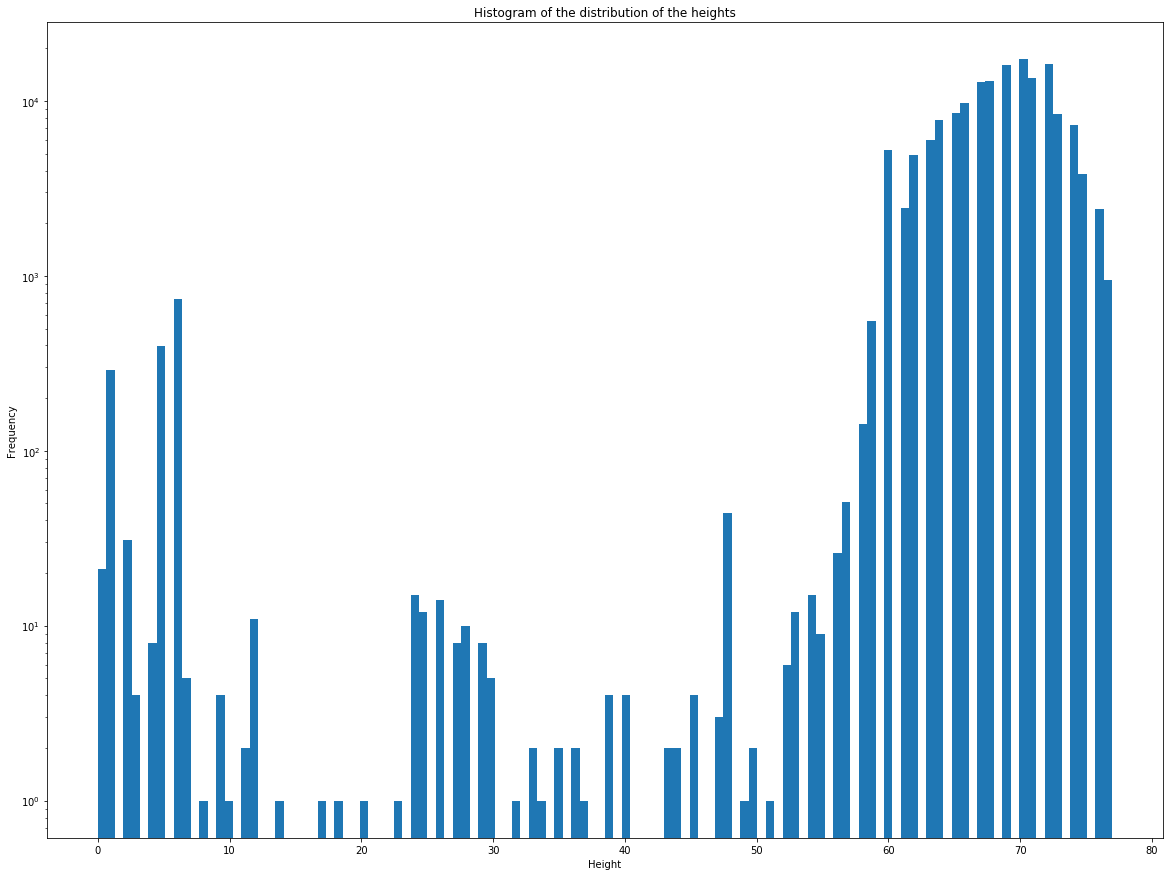

In [13]:
plt.figure(figsize=(20,15))
plt.hist(filtered, bins=120, log=True)
plt.xlabel('Height') 
plt.ylabel('Frequency') 
plt.title('Histogram of the distribution of the heights')

#Without the Logarithmic scale the figure below shows how the data will look
plt.figure(figsize=(20,15))
plt.hist(filtered['height'], bins=120, log=False)
plt.xlabel('Height') 
plt.ylabel('Frequency') 
plt.title('Histogram of the distribution of the heights')

Text(0.5, 1.0, 'Histogram of the distribution of the heights')

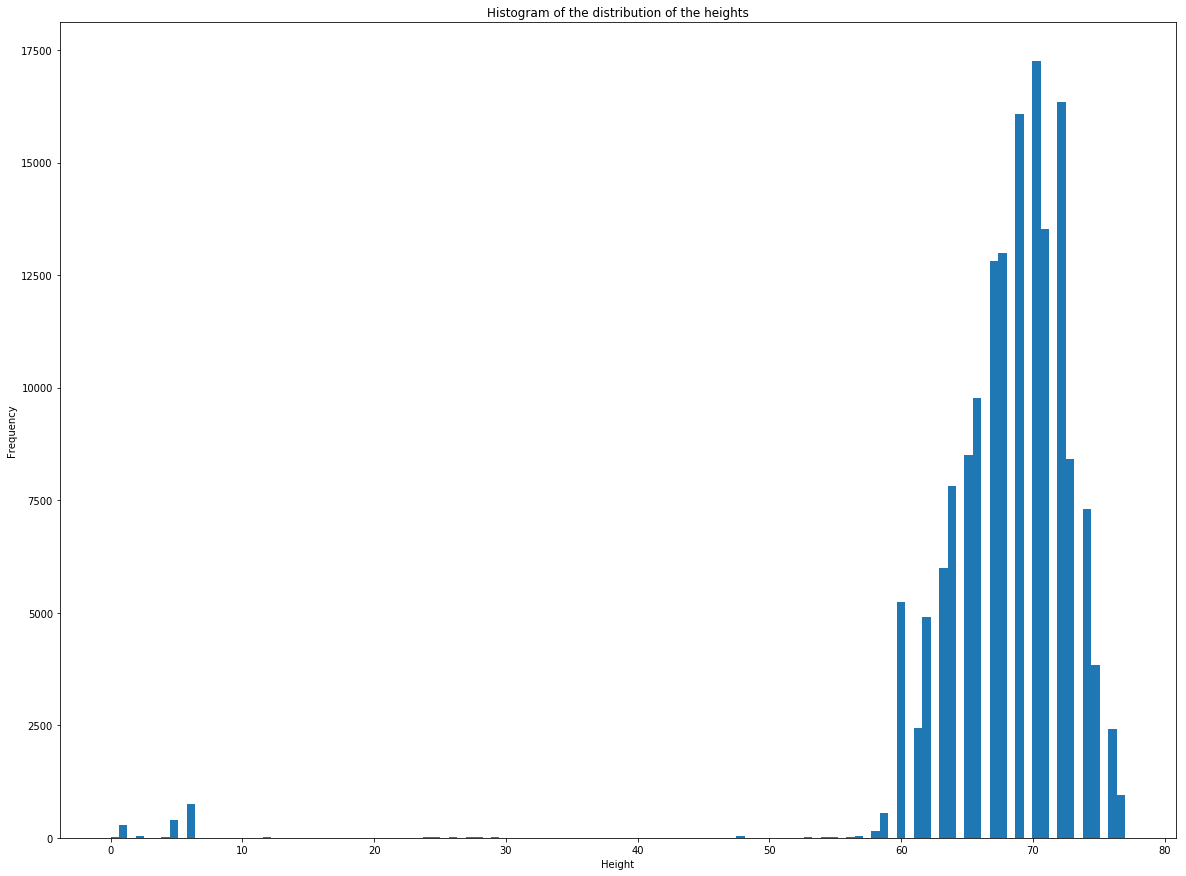

In [14]:
plt.figure(figsize=(20,15))
plt.hist(filtered, bins=120, log=False)
plt.xlabel('Height') 
plt.ylabel('Frequency') 
plt.title('Histogram of the distribution of the heights')

### Question 3
What is the average height?

In [31]:
average = np.mean(data['height'])
print(average)

120.6216840037781


### Question 4

Use simple random sampling to sample from the dataset. Choose a sample of 20000.

In [26]:
random_samples = data.sample(n = 20000)
random_samples.describe()

,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,cluster
count,20000.000000,15642.000000,7432.000000,10743.000000,2553.000000,1377.000000,1873.000000,886.000000,1410.000000,1026.000000,1636.000000,4873.000000,4546.000000,5373.000000,5124.000000,2414.000000,20000.000000
mean,291251.220100,32.524357,68.217573,170.917528,326.391696,632.057371,226.290977,1625.992099,265.612057,138.778752,1443.867971,189.393803,145.624065,333.952913,271.461358,445.997100,9.941650
std,184085.491808,7.734623,17.751705,39.625116,260.876406,288.329930,223.988007,455.198208,119.583346,457.332504,403.276587,160.082405,156.225733,175.223573,168.089253,20353.521917,6.041289
min,1642.000000,13.000000,0.000000,1.000000,45.000000,64.000000,60.000000,530.000000,0.000000,42.000000,293.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000
25%,133954.500000,27.000000,66.000000,145.000000,211.000000,521.000000,149.000000,1326.500000,235.000000,62.000000,1249.750000,140.000000,105.000000,255.000000,205.000000,15.000000,5.000000
50%,272859.500000,31.000000,69.000000,171.000000,284.000000,594.000000,193.000000,1570.500000,293.000000,70.000000,1380.000000,195.000000,145.000000,345.000000,275.000000,26.500000,10.000000
75%,470898.500000,37.000000,72.000000,193.000000,390.000000,697.000000,265.000000,1827.750000,334.000000,84.000000,1560.000000,235.000000,185.000000,415.000000,335.000000,39.000000,15.000000
max,632958.000000,115.000000,740.000000,2205.000000,7200.000000,7200.000000,5940.000000,5940.000000,758.000000,6039.000000,7200.000000,9999.000000,9998.000000,9999.000000,9999.000000,1000000.000000,20.000000


### Question 4

Use stratified sampling to sample from the dataset. Choose a sample of 20000.

In [28]:
#Stratified random sampling, with stratum as 'region'
strata = data.groupby('region').count()
groups, features = strata.shape
stratified = data.groupby('region').apply(lambda x: x.sample(n = 20000, replace = True))
stratified.describe()



,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,cluster
count,340000.000000,340000.000000,1.594150e+05,258710.000000,5.556900e+04,2.958400e+04,40855.000000,1.937200e+04,2.948600e+04,2.157800e+04,3.542300e+04,1.064630e+05,9.758500e+04,1.152830e+05,1.116950e+05,4.864400e+04,340000.000000
mean,367184.241129,32.253974,2.258912e+02,169.589324,8.441339e+02,1.501641e+03,249.369184,2.508042e+03,8.502381e+02,1.693644e+03,3.943748e+03,4.294418e+02,4.102401e+02,6.969906e+02,6.697257e+02,8.832606e+04,10.026774
std,187405.481427,7.714519,3.638980e+04,35.106377,6.250823e+04,8.452322e+04,3373.551724,8.532729e+04,6.908867e+04,1.142116e+05,1.412499e+05,4.454165e+04,4.652166e+04,5.524192e+04,5.627776e+04,1.376974e+07,6.060181
min,82.000000,13.000000,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+02,-7.000000e+00,-5.000000e+00,0.000000
25%,218352.250000,26.000000,6.600000e+01,145.000000,2.120000e+02,5.250000e+02,148.000000,1.305000e+03,2.400000e+02,6.300000e+01,1.248000e+03,1.430000e+02,1.080000e+02,2.550000e+02,2.050000e+02,1.500000e+01,5.000000
50%,389315.000000,31.000000,6.900000e+01,170.000000,2.880000e+02,5.940000e+02,191.000000,1.550000e+03,2.950000e+02,7.100000e+01,1.380000e+03,1.920000e+02,1.450000e+02,3.420000e+02,2.750000e+02,2.700000e+01,10.000000
75%,535983.750000,37.000000,7.100000e+01,190.000000,3.920000e+02,6.920000e+02,258.000000,1.800000e+03,3.370000e+02,8.500000e+01,1.560000e+03,2.350000e+02,1.850000e+02,4.150000e+02,3.350000e+02,4.000000e+01,15.000000
max,631874.000000,57.000000,8.388607e+06,2441.000000,8.388607e+06,8.388607e+06,480480.000000,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,2.147484e+09,20.000000


In [29]:
#Compare stratified sampling mean to population mean
data.describe()

,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,cluster
count,423003.000000,331110.000000,1.598690e+05,229890.000000,5.542600e+04,3.027900e+04,4.074500e+04,1.935900e+04,2.973800e+04,2.224600e+04,3.609700e+04,1.044350e+05,9.728000e+04,1.153230e+05,1.105170e+05,5.060800e+04,423006.000000
mean,292748.166538,32.516750,1.206217e+02,170.896137,9.886691e+02,1.207950e+03,5.766025e+02,2.127863e+03,1.472252e+03,5.241279e+02,3.411464e+03,2.709107e+02,2.424957e+02,6.970503e+02,5.852109e+02,4.269613e+04,9.993802
std,184969.660327,7.730671,2.097995e+04,58.379799,7.200430e+04,6.824091e+04,4.891145e+04,6.055021e+04,9.762688e+04,5.628804e+04,1.251980e+05,2.596882e+04,2.708942e+04,5.523235e+04,5.052976e+04,9.546078e+06,6.052513
min,82.000000,13.000000,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,-6.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+01,0.000000e+00,-5.000000e+02,-7.000000e+00,-6.000000e+00,0.000000
25%,135091.500000,27.000000,6.600000e+01,145.000000,2.150000e+02,5.250000e+02,1.490000e+02,1.308000e+03,2.400000e+02,6.200000e+01,1.242000e+03,1.400000e+02,1.050000e+02,2.550000e+02,2.050000e+02,1.500000e+01,5.000000
50%,275839.000000,31.000000,6.900000e+01,170.000000,2.900000e+02,5.950000e+02,1.930000e+02,1.550000e+03,2.940000e+02,7.100000e+01,1.380000e+03,1.950000e+02,1.450000e+02,3.450000e+02,2.750000e+02,2.700000e+01,10.000000
75%,473188.000000,37.000000,7.200000e+01,192.000000,3.920000e+02,6.940000e+02,2.620000e+02,1.809000e+03,3.360000e+02,8.400000e+01,1.560000e+03,2.350000e+02,1.850000e+02,4.150000e+02,3.350000e+02,3.900000e+01,15.000000
max,633083.000000,125.000000,8.388607e+06,20175.000000,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,2.147484e+09,20.000000


### Question 5
Compare simple random sampling and stratified random sampling. Compare the means generated by the two sampling techniques and discuss your observations below your code.

The first visible difference between the statistics of the two sampling methods is the count, or total size of the data for which the means were calculated. random sampling has a lot less datapoints used, and stratified random sampling has more, hence it becomes more accurate and closer to the true population statistics.

Secondly, looking at the means of the different subgroups, we can tell there is a difference between means of random sampling and means from stratified random sampling. While random sampling involves randomly sampling from the population, this means that each possible sample is equally likely to occur. Stratified random sampling on the other hand, splits the population into smaller groups or strata based on shared characteristics, in this case 'region'. From this a random sample is taken from each stratum in direct proportion to the size of the stratum compared to the population.

Hence stratified random sampling tends to give more closer means to population mean in comparison to the population mean.




### Question 6 

In  this question we are going to implement cluster sampling. Data is divided into clusters, if it isn't already divided into clusters, and then we use simple random sampling to select a number of clusters from the sample. From the group of selected clusters, we again use simple random sampling to select random data points. These now form our sample.  

Let's implement this procedure using some randomly generated data that we are going to group into clusters.

In [19]:
n_clusters = 10
rand_data = stats.norm.rvs(loc=0,        # mean 0
                      scale=1,      # variance 1
                      size=100000,  # number of points
                      random_state=None)

rand_data = pd.DataFrame({'var1': rand_data})  # turn list into dataframe with heading var1

cluster = [rnd.randint(0,9) for c in range(100000)] # generate cluster numbers for grouping

n_col = pd.Series(cluster) # turn list into Series object
rand_data['cluster'] = n_col.values


Now that we've generated random data and placed the data into clusters, generate a sample from the *athletes* data using cluster sampling technique.

<!-- Distribution fitting with scipy exercise given a dataset. Good references about El Nino dataset. I should find a climate dataset.

https://stackoverflow.com/questions/6615489/fitting-distributions-goodness-of-fit-p-value-is-it-possible-to-do-this-with/16651524#16651524

https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python -->

In [20]:
cluster = [rnd.randint(0,20) for c in range(data.shape[0])] # generate cluster numbers for grouping

n_col = pd.Series(cluster) # turn list into Series object
data['cluster'] = n_col.values

c_cluster = rnd.randint(0,20) # Cluster to choose for sampling
cluster_data = data[(data['cluster'] == c_cluster) == True]
cl_mean = cluster_data['height'].mean()
print('Cluster chosen: {0}, Mean Height = {1}'.format(c_cluster, cl_mean))

Cluster chosen: 7, Mean Height = 68.16454689984101
